<a href="https://colab.research.google.com/github/Raeiss/Assignment-ML-Besher/blob/main/Latest%20Dissertation%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#data = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
data = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

In [19]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 3 to 9999
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3833 non-null   int64  
 1   dur                3833 non-null   float64
 2   proto              3833 non-null   object 
 3   service            3833 non-null   object 
 4   state              3833 non-null   object 
 5   spkts              3833 non-null   int64  
 6   dpkts              3833 non-null   int64  
 7   sbytes             3833 non-null   int64  
 8   dbytes             3833 non-null   int64  
 9   rate               3833 non-null   float64
 10  sttl               3833 non-null   int64  
 11  dttl               3833 non-null   int64  
 12  sload              3833 non-null   float64
 13  dload              3833 non-null   float64
 14  sloss              3833 non-null   int64  
 15  dloss              3833 non-null   int64  
 16  sinpkt             3833 

In [22]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


In [6]:
data['service'].replace('-',np.nan,inplace=True)

In [7]:

data.isnull().sum()

id                      0
dur                     0
proto                   0
service              6167
state                   0
spkts                   0
dpkts                   0
sbytes                  0
dbytes                  0
rate                    0
sttl                    0
dttl                    0
sload                   0
dload                   0
sloss                   0
dloss                   0
sinpkt                  0
dinpkt                  0
sjit                    0
djit                    0
swin                    0
stcpb                   0
dtcpb                   0
dwin                    0
tcprtt                  0
synack                  0
ackdat                  0
smean                   0
dmean                   0
trans_depth             0
response_body_len       0
ct_srv_src              0
ct_state_ttl            0
ct_dst_ltm              0
ct_src_dport_ltm        0
ct_dst_sport_ltm        0
ct_dst_src_ltm          0
is_ftp_login            0
ct_ftp_cmd  

In [8]:
data.shape

(10000, 45)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(3833, 45)

In [13]:
data['attack_cat'].value_counts()

Normal    3833
Name: attack_cat, dtype: int64

In [14]:
data['state'].value_counts()

FIN    2237
CON    1575
INT      21
Name: state, dtype: int64

In [15]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,0.325912,tcp,ssh,FIN,106,114,9400,12298,671.960532,...,1,1,0,0,0,2,1,0,Normal,0
9990,9991,0.514815,tcp,smtp,FIN,52,40,37358,3276,176.762536,...,1,2,0,0,0,4,1,0,Normal,0
9991,9992,1.124713,tcp,http,FIN,12,18,1580,10168,25.784357,...,1,1,0,0,1,8,2,0,Normal,0
9992,9993,0.001135,udp,dns,CON,2,2,146,178,2643.171742,...,1,1,0,0,0,18,2,0,Normal,0


In [27]:
features = pd.read_csv('/content/NUSW-NB15_features (3).csv')

UnicodeDecodeError: ignored

In [50]:
features.head()

KeyError: ignored

In [17]:
features['Type '] = features['Type '].str.lower()

NameError: ignored

In [18]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

NameError: ignored

In [19]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

NameError: ignored

In [20]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

NameError: ignored

In [21]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

NameError: ignored

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

In [ ]:
data

FileNotFoundError: ignored

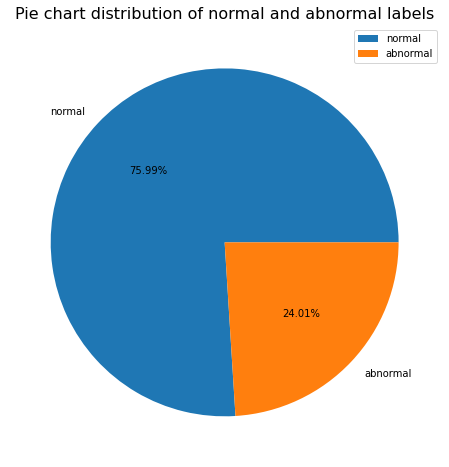

In [22]:
#Binary Classification
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [ ]:
#Multi-class Classification
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [ ]:
#One hot encoding
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

In [ ]:
data.shape

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:

data.shape

In [ ]:
# Data Normalization
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df


In [ ]:
# data before normalization
data.head()

In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

In [ ]:
#Label Encoding
#Binary Labels
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
#Multi-class Labels
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
#Correlation between features of dataset
num_col.append('label')

In [ ]:
# Correlation Matrix for Binary Labels
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

In [ ]:
#Correlation Matrix for Multi-class Labels
num_col = list(multi_data.select_dtypes(include='number').columns)

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

In [ ]:
# Feature Selection
# Binary Labels
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

In [ ]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

In [ ]:
#Saving Prepared Dataset to Disk
bin_data.to_csv('./datasets/bin_data.csv')

In [ ]:
# Multi-class Labels
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

In [ ]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [ ]:
# Saving to disk 
multi_data.to_csv('./datasets/multi_data.csv')

In [38]:
#BINARY CLASSIFICATION
#Data Splitting
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
#Linear Regression
lr_bin = LinearRegression(normalize=False)
lr_bin.fit(X_train, y_train)

In [ ]:
y_pred = lr_bin.predict(X_test)

In [ ]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [ ]:
print(cls_report)

In [ ]:
#Real and Predicted Data
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df.to_csv('./predictions/lr_real_pred_bin.csv')
lr_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Binary Classification")
plt.savefig('plots/lr_real_pred_bin.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/linear_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_bin, file)
  print("Saved model to disk")
else:
  print("Previous Model exists on the disk! Please Remove")

In [ ]:
#Logistic Regression
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

In [ ]:
logr_bin.fit(X_train,y_train)

In [ ]:
y_pred = logr_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df.to_csv('./predictions/logr_real_pred_bin.csv')
logr_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.savefig('plots/logr_real_pred_bin.png')
plt.show()

In [ ]:
pkl_filename = "./models/logistic_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Linear Support Vector Machine
lsvm_bin = SVC(kernel='linear',gamma='auto') 
lsvm_bin.fit(X_train,y_train)

In [ ]:
y_pred = lsvm_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df.to_csv('./predictions/lsvm_real_pred_bin.csv')
lsvm_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [39]:
#K Nearest Neighbor Classifier
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

NameError: ignored

In [ ]:
y_pred = knn_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df.to_csv('./predictions/knn_real_pred_bin.csv')
knn_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Binary Classification")
plt.savefig('plots/knn_real_pred_bin.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Random Forest Classifier
rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

In [ ]:
y_pred = rf_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('./predictions/rf_real_pred_bin.csv')
rf_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('plots/rf_real_pred_bin.png')
plt.show()


In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Decision Tree Classifier
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
dt_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_bin_df.to_csv('./predictions/dt_real_pred_bin.csv')
dt_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('plots/dt_real_pred_bin.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/decision_tree_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Multi Layer Perceptron
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [ ]:
mlp_bin.fit(X_train,y_train)

In [ ]:
y_pred = mlp_bin.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

In [ ]:
#Real and Predicted Data
mlp_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_bin_df.to_csv('./predictions/mlp_real_pred_bin.csv')
mlp_bin_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Binary Classification")
plt.savefig('plots/mlp_real_pred_bin.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/mlp_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [40]:
#MULTI-CLASS CLASSIFICATION
#Data Splitting
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [ ]:
#Linear Regression
lr_multi = LinearRegression(normalize=False)
lr_multi.fit(X_train, y_train)

In [ ]:
y_pred = lr_multi.predict(X_test)

In [ ]:
for i in range(len(y_pred)):
  y_pred[i] = int(round(y_pred[i]))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_multi_df.to_csv('./predictions/lr_real_pred_multi.csv')
lr_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Multi-class Classification")
plt.savefig('plots/lr_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/linear_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Logistic Regression
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

In [ ]:
y_pred = logr_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
logr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_multi_df.to_csv('./predictions/logr_real_pred_multi.csv')
logr_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Multi-class Classification")
plt.savefig('plots/logr_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/logistic_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Linear Support Vector Machine
lsvm_multi = SVC(kernel='linear',gamma='auto')
lsvm_multi.fit(X_train,y_train)

In [ ]:
y_pred = lsvm_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
lsvm_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_multi_df.to_csv('./predictions/lsvm_real_pred_multi.csv')
lsvm_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Multi-class Classification")
plt.savefig('plots/lsvm_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#K Nearest Neighbor Classifier
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train,y_train)

In [ ]:
y_pred = knn_multi.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
knn_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_multi_df.to_csv('./predictions/knn_real_pred_multi.csv')
knn_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Multi-class Classification")
plt.savefig('plots/knn_real_pred_multi.png')
plt.show()


In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Random Forest Classifier
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

In [ ]:
y_pred = rf_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./predictions/rf_real_pred_multi.csv')
rf_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('plots/rf_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Decision Tree Classifier
dt_multi = DecisionTreeClassifier(random_state=123)
dt_multi.fit(X_train,y_train)

In [ ]:
y_pred = dt_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
dt_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt_multi_df.to_csv('./predictions/dt_real_pred_multi.csv')
dt_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:700], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:700].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Multi-class Classification")
plt.savefig('plots/dt_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/decision_tree_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

In [ ]:
#Multi Layer Perceptron
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
mlp_multi.fit(X_train,y_train)

In [ ]:
y_pred = mlp_multi.predict(X_test)

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

In [ ]:
#Real and Predicted Data
mlp_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_multi_df.to_csv('./predictions/mlp_real_pred_multi.csv')
mlp_multi_df

In [ ]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:300], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Multi-class Classification")
plt.savefig('plots/mlp_real_pred_multi.png')
plt.show()

In [ ]:
#Saving Trained Model to Disk
pkl_filename = "./models/mlp_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")